In [364]:
import numpy as np
import pandas as pd

df_raw = pd.read_csv("student-mat.csv", sep=';')
df = df_raw.copy()
print(df.shape)
df

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [365]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns


df_filtered = df.copy()
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

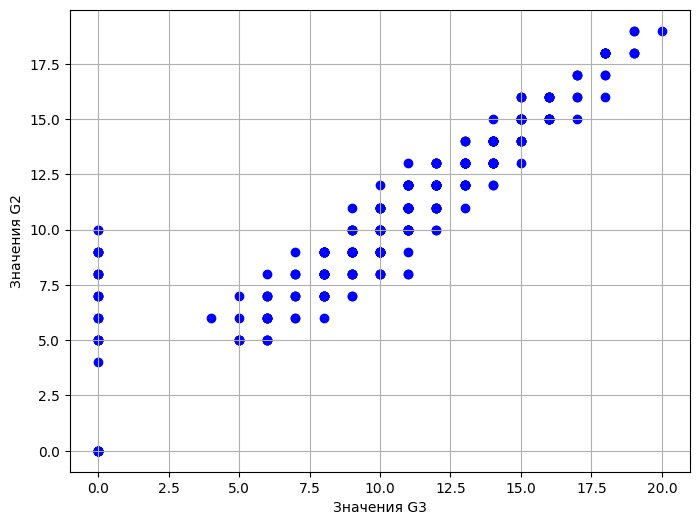

In [366]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_filtered['G3'], df_filtered['G2'], color='blue', label='G2')
plt.xlabel('Значения G3')
plt.ylabel('Значения G2')
plt.grid(True)

In [367]:
df_new = df_filtered.copy()

absences = df_new['absences'] > 30
df_new.loc[absences, 'absences'] = df_new['absences'].median()
values = df_new['G3'] == 0
df_new.loc[values, 'G1'] = df_new['G1'].min()
df_new.loc[values, 'G2'] = df_new['G2'].min()


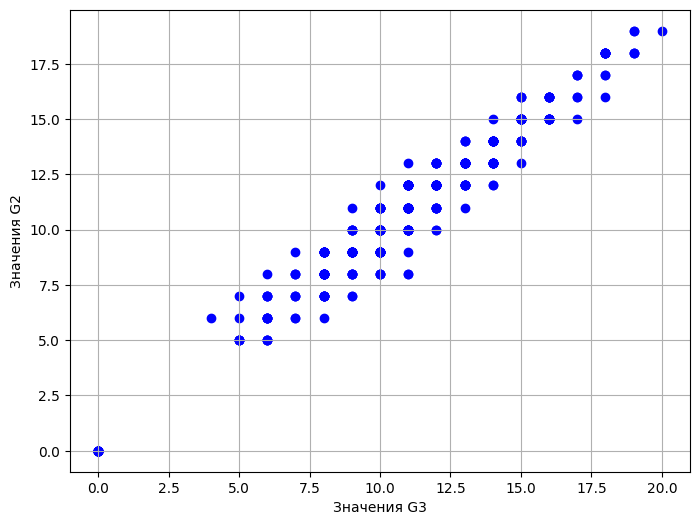

In [368]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['G2'], color='blue', label='G2')
plt.xlabel('Значения G3')
plt.ylabel('Значения G2')
plt.grid(True)

In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_data, columns=df_new.columns)
scaled_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.50,0.200000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.50,0.133333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.50,0.333333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.00,0.066667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.00,0.133333,0.1875,0.526316,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.75,0.75,...,1.00,1.00,0.75,0.75,1.00,0.75,0.366667,0.3750,0.473684,0.45
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.75,0.75,...,0.25,0.75,1.00,0.50,0.75,0.25,0.100000,0.6875,0.842105,0.80
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.50,0.50,...,1.00,1.00,0.50,0.50,0.50,0.50,0.100000,0.4375,0.421053,0.35
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.75,0.50,...,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50


In [370]:
from sklearn.model_selection import train_test_split

X = df_new.drop('G3', axis=1)  # Признаки
Y = df_new['G3']

X1 = scaled_df.drop('G3', axis=1)  # Признаки
Y1 = scaled_df['G3']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [371]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    # Здесь x — это уже tanh(z)
    return 1 - x**2

class Perceptron:
    def __init__(self, hidden_size=4, max_iter=1000, lr=0.1):
        self.w2 = None
        self.w1 = None
        self.hidden_size = hidden_size
        self.max_iter = max_iter
        self.lr = lr
        self.tol = 10**(-6)
        self.alpha = 1
        self.loss_history = []

    def fit(self, X, y):
        np.random.seed(42)
        n_samples, n_features = X.shape
        self.loss_history = []

        X = X.to_numpy()

        # y reshape
        y = y.to_numpy().reshape(-1, 1)
        pred_loss = 0.0
        loss_less = 0
        loss_more = 0

        # инициализация весов
        w1 = np.random.rand(n_features, self.hidden_size) * np.sqrt(2.0 / n_features)
        w2 = np.random.rand(self.hidden_size, 1) * np.sqrt(2.0 / self.hidden_size)

        for epoch in range(1, self.max_iter+1):
            # forward
            z1 = X.dot(w1)
            a1 = relu(z1)
            z2 = a1.dot(w2)
            a2 = z2 # линейный выход

            loss = np.mean((a2 - y) ** 2) + self.alpha / n_samples * (np.sum(w1 ** 2) + np.sum(w2 ** 2))          # здесь сама loss
            if epoch > 3:
                self.loss_history.append(loss)
            if (epoch % 100 == 0) | (epoch < 100):
                print(f"Epoch {epoch:4d} — loss: {loss:.6f}")

            if abs(loss - pred_loss) < self.tol:
                loss_less +=1
            else:
                loss_less = 0

            if loss_less >=10:
                print(f"Training loss did not improve more than tol={self.tol} for 10 consecutive epochs. Stopping.")
                break

            if (loss > pred_loss) & (pred_loss !=0):
                loss_more += 1
            else:
                loss_more = 0
                pred_loss = loss
            if loss_more >=5:
                print(f"Training loss has worsened for 5 consecutive epochs. Stopping.")
                break

            # backward
            delta2 = 2 * (a2 - y) / n_samples      # dL/dz2
            delta1 = delta2.dot(w2.T) * relu_deriv(a2)

            # градиентный спуск
            w2 -= self.lr * (a1.T.dot(delta2) + 2 * self.alpha * w2 / n_samples )
            w1 -= self.lr * (X.T.dot(delta1)  + 2 * self.alpha * w1 / n_samples )

        self.w1, self.w2 = w1, w2
        plt.plot(self.loss_history)
        plt.xlabel('Эпоха')
        plt.ylabel('log Loss')
        plt.title('График изменения Loss по эпохам')
        plt.grid(True)
        plt.show()
        return self

    def predict(self, X):
        X = X.to_numpy()
        a1 = relu(X.dot(self.w1))
        a2 = a1.dot(self.w2)

        return a2.flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        y_true = y.to_numpy()
        ss_res = np.sum((y_true.flatten() - y_pred.flatten()) ** 2)
        ss_tot = np.sum((y_true.flatten() - np.mean(y_true)) ** 2)
        r2 = 1 - ss_res / ss_tot
        return r2


Epoch    1 — loss: 148.432203
Epoch    2 — loss: 8.077249
Epoch    3 — loss: 0.727175
Epoch    4 — loss: 0.293438
Epoch    5 — loss: 0.267624
Epoch    6 — loss: 0.266059
Epoch    7 — loss: 0.265936
Epoch    8 — loss: 0.265900
Epoch    9 — loss: 0.265868
Epoch   10 — loss: 0.265837
Epoch   11 — loss: 0.265806
Epoch   12 — loss: 0.265775
Epoch   13 — loss: 0.265743
Epoch   14 — loss: 0.265712
Epoch   15 — loss: 0.265681
Epoch   16 — loss: 0.265650
Epoch   17 — loss: 0.265619
Epoch   18 — loss: 0.265588
Epoch   19 — loss: 0.265557
Epoch   20 — loss: 0.265526
Epoch   21 — loss: 0.265495
Epoch   22 — loss: 0.265464
Epoch   23 — loss: 0.265434
Epoch   24 — loss: 0.265403
Epoch   25 — loss: 0.265372
Epoch   26 — loss: 0.265341
Epoch   27 — loss: 0.265310
Epoch   28 — loss: 0.265280
Epoch   29 — loss: 0.265249
Epoch   30 — loss: 0.265218
Epoch   31 — loss: 0.265187
Epoch   32 — loss: 0.265157
Epoch   33 — loss: 0.265126
Epoch   34 — loss: 0.265095
Epoch   35 — loss: 0.265065
Epoch   36 — loss:

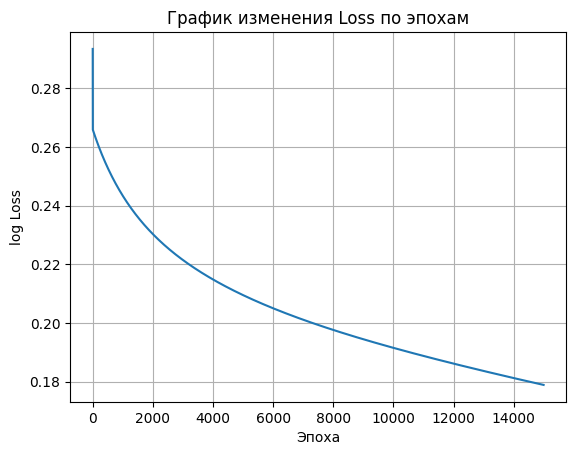

In [372]:
mlp = Perceptron(hidden_size=100, max_iter=15000, lr=0.001)
mlp.fit(X_train, y_train)

In [373]:
y_predict = mlp.predict(X_test)
mse = np.mean((y_predict - y_test) ** 2)
print(f"MSE: {mse:.4f}")

print(f"Training set score: {mlp.score(X_train, y_train):.2%}")
print(f"Testing set score: {mlp.score(X_test, y_test):.2%}\n")

sss_res = np.sum((y_predict - y_test) ** 2)
sss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
R2 = 1 - sss_res / sss_tot
print(f"R2: {R2:.4f}")

MSE: 0.0047
Training set score: 93.41%
Testing set score: 90.82%

R2: 0.9082
